In [3]:
import numpy as np
import scipy.stats as sts
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [4]:

# Download and save the data file Econ381totpts.txt
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
       'master/MLE/data/Econ381totpts.txt')
data_file = requests.get(url, allow_redirects=True)
open('Econ381totpts.txt', 'wb').write(data_file.content)

# Load the data as a NumPy array
pts = np.loadtxt('Econ381totpts.txt')

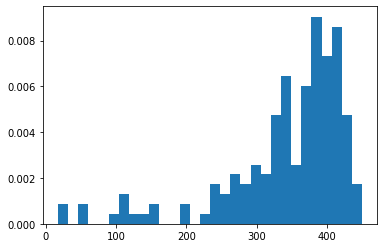

In [5]:
plt.hist(pts,30,density=True)
plt.show()

C:\Users\Z4174\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Z4174\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


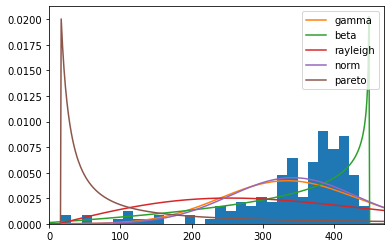

In [6]:
# scipy fit distribution

import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 500
x = scipy.arange(size)
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
h = plt.hist(pts, bins=30,density=True)

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(pts)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(x,pdf_fitted, label=dist_name)
    plt.xlim(0,470)
plt.legend(loc='upper right')
plt.show()

In [12]:
def truncated_normal( xvals ,  left_e , right_e , mu , sig   ):
    
    if right_e < left_e:
        right_e , left_e = left_e,right_e
    
    cdf_xvals = scipy.stats.norm.cdf(right_e,mu,sig) - scipy.stats.norm.cdf(left_e,mu,sig)
    
    pdf_xvals = [ ]
    for i in xvals:
        if i <= right_e:
            pdf_xvals.append(scipy.stats.norm.pdf(i,mu,sig) / cdf_xvals)
        else:
            pdf_xvals.append(10**(-18))
            
    pdf_xvals1 = np.array(pdf_xvals)
    return pdf_xvals1

In [13]:
x1 = np.linspace( 0, 450 ,10000 )
y1 = truncated_normal(x1, 0,450, 381 , 61)
y2 = truncated_normal(x1,0,450,  628, 200)
y3 = truncated_normal(x1,0,450,558,176)

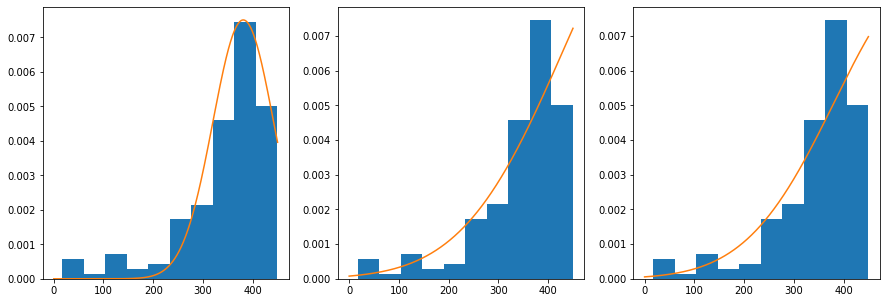

In [14]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))

ax1.hist(pts,density = True)
ax1.plot(x1,y1)


ax2.hist(pts,density = True)
ax2.plot(x1,y2)


ax3.hist(pts,density = True)
ax3.plot(x1,y3)

In [48]:
#MLE 
# get the pdf of each observation based on a pre-assumed distribution
# take log and then sum up

# maximum the log likelihood can lead to the MLE for the parameters

In [49]:
def sum_loglikelihood( xvals ,  left_e , right_e , mu , sig   ):
    
    if right_e < left_e:
        right_e , left_e = left_e,right_e
    
    cdf_xvals = scipy.stats.norm.cdf(right_e,mu,sig) - scipy.stats.norm.cdf(left_e,mu,sig)
    
    pdf_xvals = [ ]
    for i in xvals:
        if i < right_e:
            pdf_xvals.append(scipy.stats.norm.pdf(i,mu,sig) / cdf_xvals)
        else:
            pdf_xvals.append(10**(-18))
            
    pdf_xvals1 = np.array(pdf_xvals)
    
    
    log_sum_pdf_xvals = np.log(pdf_xvals1).sum()
    
    return log_sum_pdf_xvals
    
    
    

In [50]:
sum_loglikelihood(pts , 0,450,300,30)

-1552.807450725983

In [51]:
sum_loglikelihood(pts , 0,450,400,60)

-1021.2457114563108

In [52]:
# scipy.optimization all three variables: right ending points, mu and sig
def critical_function ( params , *args):
    xvals , left_e =args
    right_e , mu , sig = params
    
    neg = - sum_loglikelihood(xvals , left_e , right_e , mu ,  sig)
    return neg

In [53]:
# set up initial guess
right_e_init = 400
mu_init = 400  
sig_init = 70  
params_init = np.array([right_e_init, mu_init, sig_init])

set_args = (pts , 0 )

result1 = scipy.optimize.minimize( critical_function , params_init , args=set_args  ,method = 'Nelder-Mead' )

In [54]:
result1.x

array([449.8       , 628.23077615, 200.34342638])

In [55]:
def crit2 ( params , *args):
    xvals , left_e, right_e = args
    mu,sig = params
    
    neg = - sum_loglikelihood(xvals , left_e , right_e , mu ,  sig)
    return neg



In [56]:
params_init = np.array([mu_init, sig_init])

set_args = (pts , 0 ,450)

result = scipy.optimize.minimize( crit2 , params_init , set_args  ,method='L-BFGS-B' )

In [57]:
result.x

array([621.85775508, 198.67540451])

In [58]:
sum_loglikelihood(pts, 0 , 450 , 622 , 199)

-910.5504562485589

In [59]:
sum_loglikelihood(pts, 0 , 450 , 558 , 176)

-910.6718847426827

In [60]:
sum_loglikelihood(pts, 0 , 450 , 391 , 120)

-915.7508243380714

In [125]:
sum_loglikelihood(pts, 0 , 450 , 620 , 200)

-910.5659702964042

Text(0.5, 0, 'log likelihood')

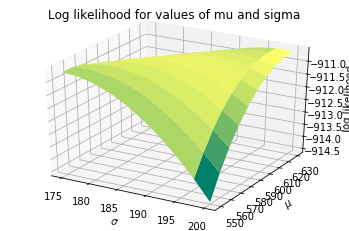

In [124]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

mu_vals = np.linspace(550, 630, 10)
sig_vals = np.linspace(175, 200, 10)
lnlik_vals = np.zeros((10, 10))
for mu_ind in range(10):
    for sig_ind in range(10):
        lnlik_vals[mu_ind, sig_ind] = sum_loglikelihood(pts,0,450, mu_vals[mu_ind],
                                                   sig_vals[sig_ind])

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Log likelihood for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')

In [126]:
# a few local maximum points can be along the ridge of the curve shape
# there looks exist a  regression line between two points from  ( 630,174) to (550,175) 
# forms a kind of regression relationship between two parameters

### Likelihood ratio test, the most common one compared with the Wald test and the Lagrange multiplier test

### wald test is (theta =^ - theta) ^ 2 / I(theta) follows the chi-square(1)

### LM test focus on the slope, S(theta) * Var(thata)^-1 * S(theta) follows the chi-square(q) q is the number of paramaters

In [62]:
# the Maximum likelihood Estimation is the result we get from the algorithm
mu_MLE,sig_MLE = result1.x[1:3]

In [63]:
result1.x[0:3]

array([449.8       , 628.23077615, 200.34342638])

In [64]:
# the mu_h and sig_h are  hypothesized values of the parameters
mu_h= 558;sig_h=176

In [65]:
log_lik_h0 = sum_loglikelihood(pts,0,450, mu_h, sig_h)
log_lik_mle = sum_loglikelihood(pts,0,450, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)


# low p value indicates the hypothesized values are highly unlikely happen 
#given the MLE is assumed highly likely happen given the data set

# high p value means that the hypothesis can not be rejected under the pre-determined significant level of test

chi squared of H0 with 2 degrees of freedom p-value =  0.8858300729694095


### Maximum Likelihood Estimator foucus on how to adjust the parameters
### to make the  empirical distribution of errors εi to follows the preassumed distribution usually N


In [66]:
# steps for doing MLE
# first define the likelihood based on the correct distribution
# second use take log for the product of possibilibity 
# Verify that uniform priors are a safe assumption!

In [67]:

import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import seaborn as sns

In [68]:
# generate data through simulation
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 10.0, size = N)
y = 5*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

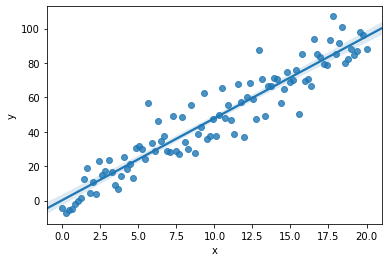

In [69]:
sns.regplot(df.x, df.y);

In [70]:
X = df[['constant', 'x']]
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     846.3
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           5.21e-50
Time:                        21:15:20   Log-Likelihood:                -366.35
No. Observations:                 100   AIC:                             736.7
Df Residuals:                      98   BIC:                             741.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.3254      1.892      0.172      0.864      -3.430       4.080
x              4.7554      0.163     29.092      0.000       4.431       5.080
==============================================================================
Omnibus:                        5.767   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.132
Skew:                           0.487   Prob(JB):                       0.0768
Kurtosis:                       3.531   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
def critical_MLE (params, *args):
    # use the params to generate a y^
    # calculate the residual term use y - y^
    # let error term follows the distribution of N ( 0, sig)
    y,x = args
    alpha , beta , sig = params
    # get y^
    y_est = alpha + beta * x
    
    #get residual = 
    residual = y - y_est
    
    # sum of loglikelihood
    
    neg_likelihood = -np.sum(sts.norm.logpdf(residual,0,sig))
    return neg_likelihood
    

In [85]:
# optimization
import scipy
# set up initial guess
alpha_init = 0
beta_init = 4  
sig_init = 5
params_init = np.array([alpha_init, beta_init, sig_init])
# put into data
set_args = (y,x)

result2= scipy.optimize.minimize(critical_MLE , params_init ,args= (set_args)  ,method = 'Nelder-Mead' )

In [86]:
result2.x

array([-4.65938534e-03,  4.77999216e+00,  9.43786330e+00])

In [89]:
residual2 = result2.x[0] + result2.x[1]*x - y

(array([ 2.,  1.,  6.,  9., 17., 22., 26., 12.,  3.,  2.]),
 array([-29.82990511, -24.43067232, -19.03143953, -13.63220674,
         -8.23297395,  -2.83374116,   2.56549163,   7.96472442,
         13.36395721,  18.76319   ,  24.16242279]),
 <a list of 10 Patch objects>)

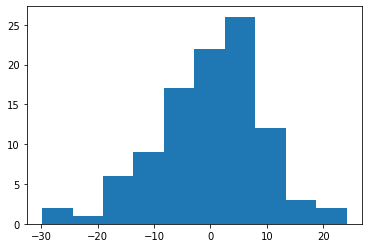

In [102]:
plt.hist(residual2)

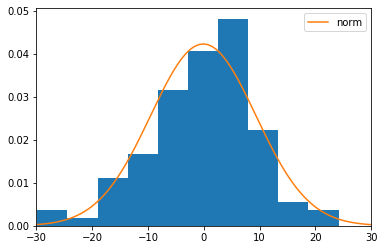

In [117]:
dist_names = ['norm']
x_arr = np.linspace(-30 , 30 ,1000)
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(residual2)
    pdf_fitted = dist.pdf(x_arr, *param[:-2], loc=param[-2], scale=param[-1])
    
    plt.hist(residual2,density=True)
    
    plt.plot(x_arr,pdf_fitted, label=dist_name)
    plt.xlim(-30,30)
plt.legend(loc='upper right')
plt.show()

In [118]:
param

(-0.08364730017937187, 9.437469012018587)

In [ ]:
# use normal distribution to fit for the residual to confirm the sig
# our result is the same as sig from cuvre fit result.